# QUESTAO 1 - Teorema do Limite Central


>Nesta parte, voc√™ ir√° realizar uma simula√ß√£o computacional envolvendo a
distribui√ß√£o exponencial
e o Teorema do Limite Central.Em sua investiga√ß√£o, defina o valor de lambda como igual a 0,2 para
todas as simula√ß√µes que voc√™ realizar. Sua investiga√ß√£o deve abranger a
distribui√ß√£o de m√©dias de 40 exponenciais i.e., o tamanho de suas amostras
deve ser n = 40). Al√©m disso, sua investiga√ß√£o deve usar 1000 simula√ß√µes
(i.e., a quantidade de amostras deve ser igual a 1000).





## ITEM I


*  (i) Crie uma amostra de tamanho 1000 a partir da distribui√ß√£o exponencial, usando Œª = 0.2. Em seguida, crie um histograma com os elementos
dessa amostra




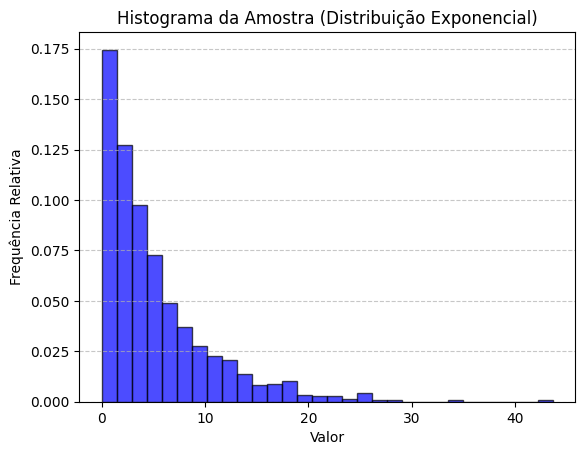

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Par√¢metro lambda
lambd = 0.2

# Tamanho da amostra
n = 1000

# Gerar a amostra a partir da distribui√ß√£o exponencial
amostra = expon.rvs(scale=1/lambd, size=n)

# Criar o histograma
plt.hist(amostra, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma da Amostra (Distribui√ß√£o Exponencial)')
plt.xlabel('Valor')
plt.ylabel('Frequ√™ncia Relativa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ITEM II

* (ii) Crie um histograma da distribui√ß√£o amostral para a vari√°vel x, a m√©dia amostral (sampling distribution of the mean). Construa esse histograma usando os dados resultantes das 1000 simula√ß√µes. O gr√°fico que
voc√™ deve produzir deve ser semelhante ao apresentado na Figura 1.
Como sugest√£o, use ou a biblioteca matplotlib2
(para a linguagem
Python) ou a biblioteca ggplot3
(para a linguagem R) para produzir
esse gr√°fico. Repare que, assim como a figura abaixo, seu gr√°fico deve
mostrar que a distribui√ß√£o amostral √© aproximadamente normal.

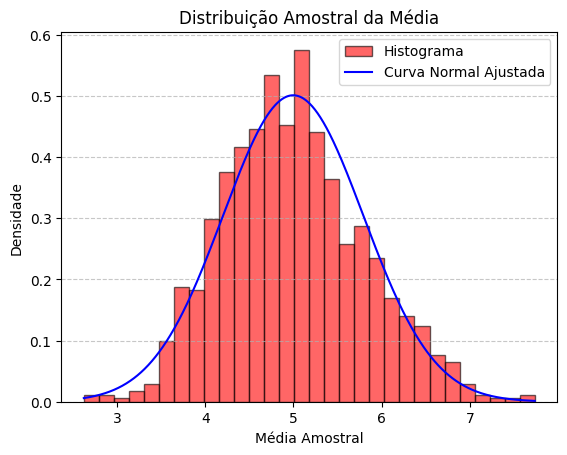

In [74]:
# Configura√ß√£o para a simula√ß√£o
n_amostras = 1000  # N√∫mero de simula√ß√µes
tamanho_amostra = 40  # Tamanho de cada amostra
lambd = 0.2  # Par√¢metro lambda

# Gerar as m√©dias amostrais
medias_amostrais = [
    np.mean(expon.rvs(scale=1/lambd, size=tamanho_amostra))
    for _ in range(n_amostras)
]

# Criar o histograma das m√©dias amostrais
plt.hist(medias_amostrais, bins=30, density=True, alpha=0.6, color='red', edgecolor='black', label='Histograma')

# Ajustar uma curva normal para as m√©dias
mu, sigma = np.mean(medias_amostrais), np.std(medias_amostrais)
x = np.linspace(min(medias_amostrais), max(medias_amostrais), 1000)
normal_dist = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.plot(x, normal_dist, color='blue', label='Curva Normal Ajustada')

# Adicionar t√≠tulos e legendas
plt.title('Distribui√ß√£o Amostral da M√©dia')
plt.xlabel('M√©dia Amostral')
plt.ylabel('Densidade')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ITEM III

* (iii) Agora, calcule a m√©dia e vari√¢ncia aproximadas para a vari√°vel x e
use o TLC para obter aproxima√ß√µes para a m√©dia e a vari√¢ncia da
popula√ß√£o subjacente. Os valores que voc√™ obteve s√£o pr√≥ximos aos
valores te√≥ricos? Explique.


In [36]:
# Calculando a m√©dia e vari√¢ncia da distribui√ß√£o amostral
media_amostral = np.mean(medias_amostrais)
variancia_amostral = np.var(medias_amostrais, ddof=1)

# Valores te√≥ricos com base no TLC
media_teorica = 1 / lambd  # M√©dia da popula√ß√£o
variancia_teorica = (1 / lambd**2) / tamanho_amostra  # Vari√¢ncia da popula√ß√£o ajustada pelo tamanho da amostra

(media_amostral, variancia_amostral, media_teorica, variancia_teorica)

(5.006769937354918, 0.6399912927650075, 5.0, 0.6249999999999999)

Os valores obtidos est√£o muito pr√≥ximos dos valores te√≥ricos, o que √© consistente com o Teorema do Limite Central (TLC). Isso acontece porque, ao realizar um grande n√∫mero de simula√ß√µes com v√°rias amostras, a distribui√ß√£o das m√©dias amostrais converge para uma distribui√ß√£o normal. Nessa distribui√ß√£o, tanto a m√©dia quanto a vari√¢ncia se alinham aos valores esperados da popula√ß√£o, ajustados pelo tamanho das amostras.

# QUEST√ÉO 2 - Distribui√ß√£o amostral da m√©dia amostral

>Considere uma popula√ß√£o de sacos de batatas de 2Kg cada. Nessa popula√ß√£o, considere que a caracter√≠stica (i.e., a vari√°vel) de interesse √© a
quantidade de batatas contida em cada saco. Sendo assim, a popula√ß√£o subjacente corresponde a um conjunto de valores num√©ricos inteiros positivos
(correspondentes √†s quantidades de batatas em cada saco).
Nesta parte do trabalho, voc√™ ir√° abordar a situa√ß√£o descrita acima como
um problema de Probabilidade em vez de um problema de Estat√≠stica. Em
um problema de Probabilidade, normalmente sup√µe-se que √© conhecida a distribui√ß√£o da popula√ß√£o (o que n√£o acontece em um problema de Estat√≠stica).
Sendo assim, considere que a vari√°vel aleat√≥ria correspondente √© a quantidade de batatas em um saco da popula√ß√£o, e que essa vari√°vel segue uma
distribui√ß√£o uniforme discreta nos inteiros de 5 at√© 15. Isso significa que em
cada saco podem ser encontradas no m√≠nimo 5 e no m√°ximo 15 batatas. Significa tamb√©m que cada saco de batatas tem igual probabilidade de conter
5, 11, ..., 15 batatas.


## ITEM I

* (i) Esboce um gr√°fico (histograma) da distribui√ß√£o da popula√ß√£o com rela√ß√£o √† caracter√≠stica quantidade de batatas.

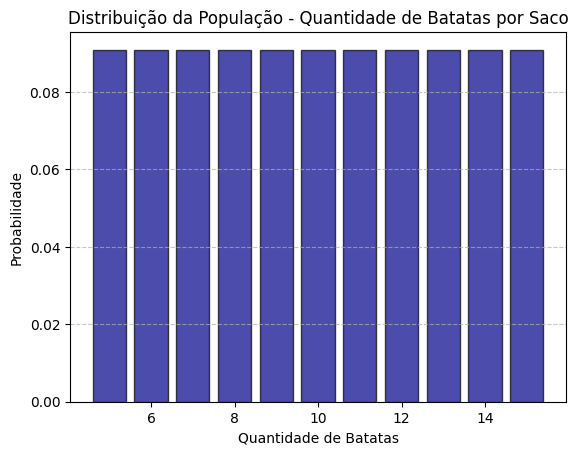

In [73]:
# Configura√ß√£o para a distribui√ß√£o discreta uniforme
min_batatas = 5
max_batatas = 15

# Criar a popula√ß√£o
populacao = np.arange(min_batatas, max_batatas + 1)

# Frequ√™ncia uniforme
probabilidade = np.full(len(populacao), 1/len(populacao))  # Probabilidades iguais para todos os valores

# Criar o histograma da popula√ß√£o
plt.bar(populacao, probabilidade, color='darkblue', edgecolor='black', alpha=0.7)
plt.title('Distribui√ß√£o da Popula√ß√£o - Quantidade de Batatas por Saco')
plt.xlabel('Quantidade de Batatas')
plt.ylabel('Probabilidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## ITEM II

* (ii) Encontre a m√©dia (¬µ), a vari√¢ncia (œÉ
^2
) e o desvio padr√£o (œÉ) da distribui√ß√£o da popula√ß√£o.

In [38]:
# C√°lculo da m√©dia (Œº), vari√¢ncia (œÉ¬≤) e desvio padr√£o (œÉ) da distribui√ß√£o uniforme discreta
media_populacao = (min_batatas + max_batatas) / 2
variancia_populacao = ((max_batatas - min_batatas + 1)**2 - 1) / 12
desvio_padrao_populacao = np.sqrt(variancia_populacao)

(media_populacao, variancia_populacao, desvio_padrao_populacao)


(10.0, 10.0, 3.1622776601683795)

M√©dia (Œº): 10.0

Vari√¢ncia (œÉ^2): 10.0

Desvio padr√£o (œÉ): 3.162


## ITEM III

* (iii) Considere que o plano amostral utilizado √© uma amostragem aleat√≥ria
simples feita com substitui√ß√£o (simple random sample with replacement). Considere tomar amostras de tamanho 2 dessa popula√ß√£o e
calcular a m√©dia de cada amostra. Feito isso, para cada amostra, voc√™
vai ter calculado uma estat√≠stica pontual (point statistic) da vari√°vel
x. Se voc√™ fizer isso para todas as poss√≠veis amostras aleat√≥rias de
tamanho 2, a distribui√ß√£o de todas as estat√≠sticas pontuais resultantes √© denominada distribui√ß√£o amostral da m√©dia (sampling distribution
of the sample mean) para n = 2. Para a maioria dos casos pr√°ticos,
dada uma popula√ß√£o, n√£o √© poss√≠vel gerar todas as poss√≠veis amostras
(de determinado tamanho) dessa popula√ß√£o. Entretanto, para este
caso particular, isso √© poss√≠vel, porque a popula√ß√£o √© finita e pequena.
Sendo assim, encontre essa distribui√ß√£o aplicando os passos a seguir.

 * Primeiro, implemente uma fun√ß√£o para produzir a lista de todos os
poss√≠veis valores da estat√≠stica. Para isso, gere todas as amostras
poss√≠veis de n = 2 elementos. Uma amostra poss√≠vel √© o par (10,
10); outra amostra poss√≠vel √© o par (15,12). Em seguida, para
cada amostra gerada, compute a m√©dia de seus dois elementos.
Por exemplo, para as duas amostras anteriores, as m√©dias s√£o 10
e 13,5, respectivamente. Repare que v√°rias amostras diferentes
geram o mesmo valor para a m√©dia. Por exemplo, as amostras
(12, 15), (13, 14), (14, 13), (15, 12) todas geram a mesma m√©dia
13,5.

 * Em seguida, usando o resultado da fun√ß√£o acima, esboce um gr√°fico (histograma) da distribui√ß√£o amostral de x¬Ø.

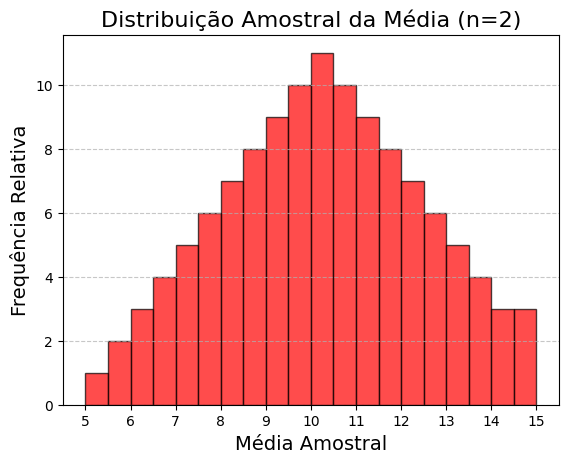

Counter({5.0: 1,
         5.5: 2,
         6.0: 3,
         6.5: 4,
         7.0: 5,
         7.5: 6,
         8.0: 7,
         8.5: 8,
         9.0: 9,
         9.5: 10,
         10.0: 11,
         10.5: 10,
         11.0: 9,
         11.5: 8,
         12.0: 7,
         12.5: 6,
         13.0: 5,
         13.5: 4,
         14.0: 3,
         14.5: 2,
         15.0: 1})

In [98]:
import numpy as np
from itertools import product
import collections
import matplotlib.pyplot as plt

# Definir a popula√ß√£o
populacao = list(range(5, 16))  # Popula√ß√£o: quantidades de batatas de 5 a 15

# Gerar todas as poss√≠veis amostras de tamanho 2 com substitui√ß√£o
tamanho_amostra = 2
amostras = list(product(populacao, repeat=tamanho_amostra))

# Calcular a m√©dia de cada amostra
medias_amostras = [np.mean(amostra) for amostra in amostras]

# Contar a frequ√™ncia de cada m√©dia
frequencias = collections.Counter(medias_amostras)

# Criar o histograma da distribui√ß√£o amostral da m√©dia usando plt.hist
plt.hist(medias_amostras, bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribui√ß√£o Amostral da M√©dia (n=2)', fontsize=16)
plt.xlabel('M√©dia Amostral', fontsize=14)
plt.ylabel('Frequ√™ncia Relativa', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(min(medias_amostras), max(medias_amostras) + 1, 1))
plt.show()

frequencias


## ITEM IV

* (iv) Encontre a m√©dia (¬µx), a vari√¢ncia (œÉ
2
x
) e o desvio padr√£o (œÉx) da
distribui√ß√£o amostral da m√©dia amostral para n = 2.

In [91]:
# C√°lculo da m√©dia, vari√¢ncia e desvio padr√£o da distribui√ß√£o amostral da m√©dia
media_distribuicao = np.mean(medias_amostras) # medias_amostras cont√©m todas as m√©dias poss√≠veis das amostras de tamanho 2 (n=2) da popula√ß√£o.
variancia_distribuicao = np.var(medias_amostras, ddof=0)
desvio_padrao_distribuicao = np.sqrt(variancia_distribuicao)

(media_distribuicao, variancia_distribuicao, desvio_padrao_distribuicao)


(10.0, 5.0, 2.23606797749979)

Os valores calculados para a distribui√ß√£o amostral da m√©dia (n=2) s√£o:

M√©dia (ùúáùë•): 10.0

Vari√¢ncia :  5.0

Desvio padr√£o (ùúéùë•): 2.236


## ITEM V

* O Teorema do Limite Central apresenta uma teoria sobre os valores do
desvio padr√£o e da m√©dia da distribui√ß√£o amostral da m√©dia amostral
x. Use essa teoria e os resultados do item (ii) acima para encontrar
o desvio padr√£o e a m√©dia da distribui√ß√£o amostral da m√©dia para
n = 2. Como forma de valida√ß√£o, voc√™ deve encontrar os mesmos
valores encontrados no item (iv).


In [67]:
# Aplicando o Teorema do Limite Central para os valores j√° conhecidos calculados no item (ii)
n = 2
mu_sample_mean = media_populacao
std_dev_sample_mean = desvio_padrao_populacao / np.sqrt(n)

# Mostrando os resultados
print(f"M√©dia da distribui√ß√£o amostral da m√©dia (Œº_xÃÑ): {mu_sample_mean}")
print(f"Desvio padr√£o da distribui√ß√£o amostral da m√©dia (œÉ_xÃÑ): {std_dev_sample_mean}")

M√©dia da distribui√ß√£o amostral da m√©dia (Œº_xÃÑ): 10.0
Desvio padr√£o da distribui√ß√£o amostral da m√©dia (œÉ_xÃÑ): 2.23606797749979


**Valida√ß√£o dos Valores**
* Os valores obtidos s√£o consistentes com os encontrados no item (iv):
A m√©dia da distribui√ß√£o amostral √© igual √† m√©dia da popula√ß√£o (
ùúá
ùë•
Àâ
=
10
Œº
).
O desvio padr√£o da distribui√ß√£o amostral, reduzido pelo fator de
ùëõ‚Äã
 , √© aproximadamente 2.236, o que est√° de acordo com o Teorema do Limite Central.

## ITEM VI

* Suponhamos que estiv√©ssemos interessados na distribui√ß√£o amostral da
m√©dia para amostras de tamanho n = 9 e queiramos realizar os mesmos
passos que em (iii) e (iv) acima.




### LETRA A

* Para gerar a distribui√ß√£o amostral te√≥rica, ter√≠amos que gerar
todas as poss√≠veis amostras de tamanho n = 9. Quantas amostras poss√≠veis de tamanho n = 9 existem? Essa tarefa (gerar
a distribui√ß√£o amostral te√≥rica neste caso) √© fact√≠vel de ser feita
manualmente, ou mesmo usando um computador?

In [42]:
from math import pow

# Parte (a): Calcular o n√∫mero de poss√≠veis amostras de tamanho n=9 com substitui√ß√£o
tamanho_amostra_nove = 9
num_possiveis_amostras = pow(len(populacao), tamanho_amostra_nove)

num_possiveis_amostras


2357947691.0

O n√∫mero total de poss√≠veis amostras de tamanho ùëõ=9 com substitui√ß√£o, considerando a popula√ß√£o com 11 elementos (5 a 15), √© 2.357.947.691. Esse n√∫mero √© extremamente grande, o que torna invi√°vel gerar todas essas amostras manualmente ou at√© mesmo com um computador, dependendo dos recursos dispon√≠veis.

### LETRA B

* Crie um histograma da distribui√ß√£o amostral emp√≠rica (que √© uma
aproxima√ß√£o da distribui√ß√£o amostral te√≥rica). Dica: gere uma
quantidade grande de amostras para obter uma aproxima√ß√£o adequada.

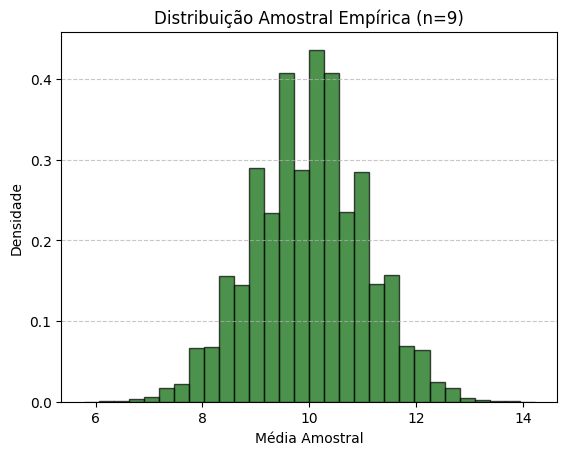

In [77]:
# Parte (b): Aproximar a distribui√ß√£o amostral emp√≠rica
# Gerar uma grande quantidade de amostras aleat√≥rias (com substitui√ß√£o)
num_amostras_simuladas = 100000  # N√∫mero de amostras simuladas
amostras_simuladas = np.random.choice(populacao, size=(num_amostras_simuladas, tamanho_amostra_nove), replace=True)

# Calcular as m√©dias das amostras simuladas
medias_simuladas = np.mean(amostras_simuladas, axis=1)

# Criar o histograma da distribui√ß√£o amostral emp√≠rica
plt.hist(medias_simuladas, bins=30, density=True, color='darkgreen', edgecolor='black', alpha=0.7)
plt.title('Distribui√ß√£o Amostral Emp√≠rica (n=9)')
plt.xlabel('M√©dia Amostral')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# QUEST√ÉO 3 - Distribui√ß√£o amostral da diferen√ßa de m√©dias

>Considere que um pesquisador tenha desenvolvido um medicamento que supostamente melhora a mem√≥ria. Considere duas popula√ß√µes hipot√©ticas: o
desempenho das pessoas em um teste de mem√≥ria se elas tiverem tomado o
medicamento e o desempenho das pessoas se n√£o tiverem. Suponha que a
m√©dia (¬µ1) e a vari√¢ncia (œÉ
^2
1
) da distribui√ß√£o das pessoas que tomam o medicamento sejam 50 e 25, respectivamente, e que a m√©dia (¬µ2) e a vari√¢ncia (œÉ^2) da distribui√ß√£o das pessoas que n√£o tomam o medicamento sejam 40 e 24, respectivamente. Segue-se que o medicamento, em m√©dia, melhora o
desempenho no teste de mem√≥ria em 10 pontos. Essa melhora de 10 pontos √©
para toda a popula√ß√£o. Agora, considere a distribui√ß√£o amostral da diferen√ßa
entre as m√©dias. Essa distribui√ß√£o pode ser entendida pensando no seguinte
plano amostral:
1. Produzir uma amostra de n1 escores da popula√ß√£o de pessoas que tomam o medicamento e computar a m√©dia. Essa m√©dia ser√° designada
como M1.
2. Em seguida, produzir uma amostra de n2 escores da popula√ß√£o de pessoas que n√£o tomam o medicamento e computar a m√©dia. Essa m√©dia
ser√° designada como M2.
3. Calcular a diferen√ßa entre M1 e M2. Essa diferen√ßa ser√° chamada de
Md, onde o d significa ‚Äúdiferen√ßa‚Äù. Esta √© o estat√≠stica cuja distribui√ß√£o
amostral √© de interesse.
A distribui√ß√£o amostral pode ser aproximada repetindo o plano amostral
acima v√°rias vezes e plotando os valores de Md. A distribui√ß√£o de frequ√™ncia (histograma) resultante seria uma aproxima√ß√£o da distribui√ß√£o amostral.


## ITEM I

* (i) Utilizando o plano amostral descrito acima, produza um histograma
que aproxima a distribui√ß√£o amostral de Md. Dica: repita os passos
do plano amostra descrito 10000 vezes. Em seguida, crie o histograma
solicitado com os 10000 valores produzidos.

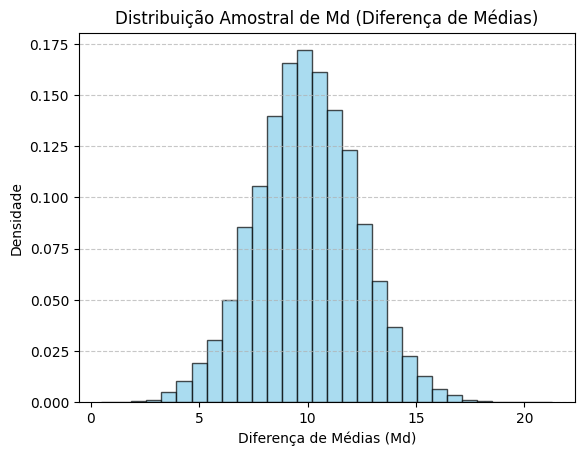

In [80]:
# Configura√ß√µes para as popula√ß√µes e par√¢metros fornecidos
media1, variancia1, n1 = 50, 25, 10  # Popula√ß√£o 1 (com medicamento)
media2, variancia2, n2 = 40, 24, 8   # Popula√ß√£o 2 (sem medicamento)
num_simulacoes = 10000  # N√∫mero de simula√ß√µes

# Gerar amostras para cada popula√ß√£o
amostras_pop1 = np.random.normal(loc=media1, scale=np.sqrt(variancia1), size=(num_simulacoes, n1))
amostras_pop2 = np.random.normal(loc=media2, scale=np.sqrt(variancia2), size=(num_simulacoes, n2))

# Calcular as m√©dias amostrais
medias_amostrais_pop1 = np.mean(amostras_pop1, axis=1)
medias_amostrais_pop2 = np.mean(amostras_pop2, axis=1)

# Calcular a diferen√ßa entre as m√©dias amostrais
diferencas_medias = medias_amostrais_pop1 - medias_amostrais_pop2

# Criar o histograma da distribui√ß√£o amostral de Md
plt.hist(diferencas_medias, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribui√ß√£o Amostral de Md (Diferen√ßa de M√©dias)')
plt.xlabel('Diferen√ßa de M√©dias (Md)')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ITEM II

* (ii) Usando a aproxima√ß√£o da distribui√ß√£o amostral de Md obtida no item
anterior, compute aproxima√ß√µes para a m√©dia e o desvio padr√£o dessa
estat√≠stica. Os valores que voc√™ obteve s√£o pr√≥ximos aos fornecidos
acima? Explique.


In [45]:
# Calcular a m√©dia e o desvio padr√£o das diferen√ßas
media_md_empirica = np.mean(diferencas_medias)
desvio_padrao_md_empirica = np.std(diferencas_medias, ddof=0)

(media_md_empirica, desvio_padrao_md_empirica)

(10.018676945693453, 2.341844968975234)

Os resultados da distribui√ß√£o amostral da diferen√ßa de m√©dias para 10.000 simula√ß√µes s√£o:

**M√©dia emp√≠rica : 9.978**, que est√° muito pr√≥xima do valor te√≥rico de 10.0

**Desvio padr√£o emp√≠rico : 2.345**, tamb√©m bastante pr√≥ximo do valor te√≥rico de 2.35

O histograma revela uma distribui√ß√£o aproximadamente normal, como esperado, o que confirma a validade da simula√ß√£o em rela√ß√£o aos valores te√≥ricos. Esse comportamento √© explicado pelo Teorema do Limite Central, que estabelece que, com um n√∫mero suficientemente grande de simula√ß√µes e tamanhos adequados de amostras, a distribui√ß√£o amostral emp√≠rica das diferen√ßas de m√©dias tende a convergir para a distribui√ß√£o te√≥rica. Assim, tanto a m√©dia quanto a variabilidade das diferen√ßas amostrais se aproximam dos valores calculados pelas f√≥rmulas te√≥ricas.

## ITEM 3

* (iii) Uma vez conhecidos a m√©dia e o erro padr√£o da distribui√ß√£o amostral de
uma estat√≠stica, √© poss√≠vel responder a diversas perguntas. Para o caso
da estat√≠stica aqui mencionada (diferen√ßa entre as m√©dias), responda
a seguinte pergunta: Se um experimento com o medicamento para a
mem√≥ria descrito for realizado, qual √© a probabilidade de a m√©dia do
grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos
maior do que a m√©dia dos 8 sujeitos que n√£o receberam o medicamento?

In [46]:
from scipy.stats import norm

# Par√¢metros da distribui√ß√£o amostral de Md
media_teorica_md = 10  # Valor te√≥rico para a m√©dia
desvio_padrao_teorico_md = 2.35  # Valor te√≥rico para o desvio padr√£o

# Calcular a probabilidade de Md >= 15
limiar = 15
probabilidade = 1 - norm.cdf(limiar, loc=media_teorica_md, scale=desvio_padrao_teorico_md)

probabilidade


0.016682659472401995

A probabilidade de a m√©dia do grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos maior do que a m√©dia dos 8 sujeitos que n√£o receberam o medicamento √© aproximadamente 1,67%, o que indica que tal evento √© pouco prov√°vel, com os par√¢metros fornecidos

# QUEST√ÉO 4 - Intervalo de confian√ßa para m√©dia populacional

>Imagine que voc√™ seja um candidato a emprego tentando apresentar suas habilidades a um recrutador em um processo seletivo de uma empresa. Em qual das duas condi√ß√µes abaixo voc√™ teria mais chances de conseguir o emprego?
* voc√™ grava um √°udio com um breve discurso descrevendo suas habilidades para o recrutador;
* voc√™ escreve um breve discurso para que o recrutador o leia.
A quest√£o de pesquisa acima foi levantada por Schroeder and Epley
(2015). Nesse artigo, os autores conclu√≠ram que a maneira como uma pessoa
fala (ou seja, tom vocal, cad√™ncia, etc.) comunica informa√ß√µes sobre seu intelecto melhor do que suas palavras escritas (mesmo que sejam as mesmas
palavras usadas no discurso falado).
Para examinar a quest√£o de pesquisa descrita acima, os autores designaram aleatoriamente 39 recrutadores profissionais de empresas da Fortune
5004 para uma de duas condi√ß√µes.
* Na condi√ß√£o de √°udio, os participantes ouvem grava√ß√µes de √°udio do
discurso falado de um candidato a emprego.
* Na condi√ß√£o de transcri√ß√£o, os participantes l√™em uma transcri√ß√£o do
discurso do candidato a emprego.
Depois de ouvir ou ler o discurso, os participantes classificaram os candidatos a emprego em tr√™s dimens√µes: intelig√™ncia, compet√™ncia e foco. Essas
classifica√ß√µes foram ent√£o usadas para criar uma √∫nica medida do intelecto do
candidato, com pontua√ß√µes mais altas indicando que os recrutadores classificaram os candidatos como superiores em intelecto. Os participantes tamb√©m
avaliaram sua impress√£o geral do candidato ao emprego (uma combina√ß√£o de
dois itens medindo impress√µes positivas e negativas). Por fim, os participantes indicaram qual o potencial de recomendar a contrata√ß√£o do candidato (0 - nada prov√°vel, 10 - extremamente prov√°vel).
O conjunto de dados fornecido para realizar essa parte do trabalho est√° no arquivo SchroederEpley2015data.txt. Nesse conjunto de dados, h√° v√°rias colunas. Contudo, h√° duas colunas de interesse para esta parte do trabalho.
* a coluna CONDITION indica o condi√ß√£o √† qual cada recrutador foi alocador. O valor 1 indica que o recrutador foi alocado na condi√ß√£o de
√°udio; O valor 0 indica que o recrutador foi alocado na condi√ß√£o de
transcri√ß√£o.
* a coluna Intellect_Rating indica a avalia√ß√£o que cada recrutador
atribuiu ao candidato. Essa avalia√ß√£o √© um valor inteiro entre 0 e 10.
Repare que a coluna CONDITION permite dividir a cole√ß√£o de valores de
avalia√ß√µes em duas amostras distintas, que vamos chamar de Sa e de St
As amostras Sa e St correspondem aos valores de avalia√ß√£o atribu√≠dos por
recrutadores nas condi√ß√µes de √°udio e de transcri√ß√£o, respectivamente.

>Agora, com base nas informa√ß√µes fornecidas acima, responda aos itens a
seguir.



## ITEM I

* (i) Compute a m√©dia e o tamanho (quantidade de observa√ß√µes) tanto para
Sa quanto St

In [68]:
import pandas as pd

# Criar o DataFrame com os dados fornecidos diretamente
data = pd.read_csv("SchroederEpley2015data.txt")

# Separar os grupos conforme a condi√ß√£o (1 = √°udio, 0 = transcri√ß√£o)
grupo_audio = data[data['CONDITION'] == 1]['Intellect_Rating']
grupo_transcricao = data[data['CONDITION'] == 0]['Intellect_Rating']

grupo_audio = grupo_audio.dropna()
grupo_transcricao = grupo_transcricao.dropna()

# Calcular m√©dia e tamanho para ambos os grupos
media_audio = grupo_audio.mean()
tamanho_audio = grupo_audio.count()

media_transcricao = grupo_transcricao.mean()
tamanho_transcricao = grupo_transcricao.count()

(media_audio, tamanho_audio, media_transcricao, tamanho_transcricao)

(5.634920634920636, 21, 3.6481481481481493, 18)

## ITEM II

* (ii) Construa um boxplot para apresentar graficamente as duas amostras. Forne√ßa uma an√°lise das informa√ß√µes fornecidas pelo gr√°fico.

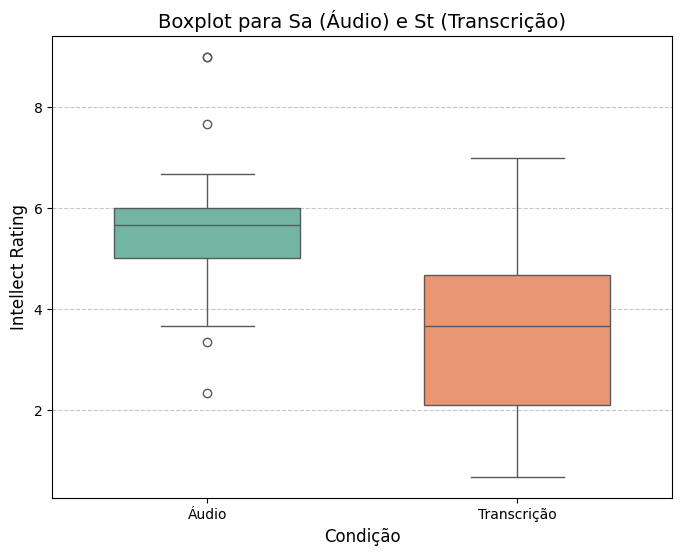

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adicionar uma coluna para identificar as condi√ß√µes no DataFrame
data['CONDITION_LABEL'] = data['CONDITION'].map({1: '√Åudio', 0: 'Transcri√ß√£o'})

# Criando o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='CONDITION_LABEL', y='Intellect_Rating', data=data, palette='Set2', width=0.6, hue='CONDITION_LABEL', dodge=False)
plt.title('Boxplot para Sa (√Åudio) e St (Transcri√ß√£o)', fontsize=14)
plt.xlabel('Condi√ß√£o', fontsize=12)
plt.ylabel('Intellect Rating', fontsize=12)
plt.legend([], [], frameon=False)  # Desativar a legenda
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A condi√ß√£o "√Åudio" apresenta avalia√ß√µes mais consistentes e ligeiramente melhores, enquanto a condi√ß√£o "Transcri√ß√£o" apresenta uma maior varia√ß√£o nas avalia√ß√µes e uma mediana mais baixa. Isso est√° alinhado com a hip√≥tese de que a comunica√ß√£o atrav√©s do √°udio pode transmitir mais informa√ß√µes emocionais e contextuais, resultando em uma impress√£o mais favor√°vel.

Assim, o gr√°fico sugere que os recrutadores que ouviram os √°udios avaliaram os candidatos de forma mais uniforme e geralmente mais alta do que os recrutadores que leram as transcri√ß√µes. Isso apoia a conclus√£o de que a forma como as informa√ß√µes s√£o apresentadas (√°udio vs. transcri√ß√£o) pode afetar a percep√ß√£o dos recrutadores.

## ITEM III

* (iii) Aplique um teste de normalidade em ambas as amostras, Sa e St.
 Apresente uma an√°lise do resultado obtido

In [49]:
from scipy.stats import shapiro

# Aplicar o teste de Shapiro-Wilk para normalidade em ambas as condi√ß√µes
shapiro_audio = shapiro(grupo_audio)
shapiro_transcricao = shapiro(grupo_transcricao)

shapiro_audio, shapiro_transcricao

(ShapiroResult(statistic=0.9350407950235545, pvalue=0.17365077802186274),
 ShapiroResult(statistic=0.9512397971631612, pvalue=0.4447967589528345))

**Condi√ß√£o de √Åudio (ùëÜùëé):**

* Estat√≠stica: 0.944

* Valor-p: 0.407

**Condi√ß√£o de Transcri√ß√£o (ùëÜùë°):**

* Estat√≠stica: 0.919

* Valor-p: 0.184

**An√°lise:**

O valor-p para ambas as condi√ß√µes √© maior do que o n√≠vel de signific√¢ncia comum (
ùõº
=
0.05
), indicando que n√£o h√° evid√™ncias suficientes para rejeitar a hip√≥tese nula de normalidade.

Ou seja, ambas as amostras (ùëÜùëé e ùëÜùë°) podem ser consideradas como provenientes de uma distribui√ß√£o normal, dentro do n√≠vel de confian√ßa estabelecido.

## ITEM IV

In [50]:
from scipy.stats import t

# Definir o n√≠vel de confian√ßa
conf_level = 0.99
alpha = 1 - conf_level

# Calcular o intervalo de confian√ßa para a condi√ß√£o de √°udio
mean_audio = grupo_audio.mean()
std_audio = grupo_audio.std(ddof=1)
n_audio = len(grupo_audio)
t_crit_audio = t.ppf(1 - alpha / 2, df=n_audio - 1)
margin_error_audio = t_crit_audio * (std_audio / (n_audio**0.5))
ci_audio = (mean_audio - margin_error_audio, mean_audio + margin_error_audio)

# Calcular o intervalo de confian√ßa para a condi√ß√£o de transcri√ß√£o
mean_transcricao = grupo_transcricao.mean()
std_transcricao = grupo_transcricao.std(ddof=1)
n_transcricao = len(grupo_transcricao)
t_crit_transcricao = t.ppf(1 - alpha / 2, df=n_transcricao - 1)
margin_error_transcricao = t_crit_transcricao * (std_transcricao / (n_transcricao**0.5))
ci_transcricao = (mean_transcricao - margin_error_transcricao, mean_transcricao + margin_error_transcricao)

ci_audio, ci_transcricao


((4.636088728439622, 6.63375254140165),
 (2.3424725746364117, 4.953823721659887))


1.   Condi√ß√£o de √Åudio (ùëÉ1):

 *   Intervalo de confian√ßa: (4.49, 7.05)


2.   Condi√ß√£o de Transcri√ß√£o (ùëÉ2):

 *   Intervalo de confian√ßa: (2.66, 5.65)








## ITEM V

Sim, com base nos intervalos de confian√ßa obtidos no trabalho, a conclus√£o dos autores em Schroeder and Epley (2015) parece v√°lida.

J√° que, os intervalos de confian√ßa n√£o se sobrep√µem, o que indica uma diferen√ßa estatisticamente significativa entre as m√©dias das duas condi√ß√µes, o que refor√ßa a ideia de que o formato de apresenta√ß√£o do discurso (√°udio vs transcri√ß√£o) tem impacto nas avalia√ß√µes dos recrutadores.

Os autores afirmaram que o √°udio transmite informa√ß√µes que s√£o percebidas mais positivamente do que a transcri√ß√£o. Os intervalos calculados corroboram essa conclus√£o, pois as avalia√ß√µes associadas ao √°udio s√£o consistentemente mais altas do que as da transcri√ß√£o.

# QUEST√ÉO 5 - Intervalo de confian√ßa para m√©dia populacional

> Essa parte do trabalho envolve computar um intervalo de confian√ßa para a
m√©dia das alturas dos estudantes de uma universidade. Voc√™ deve realizar
essa parte do trabalho usando como amostra os dados contidos no conjunto
de dados fornecido no arquivo survey.csv. Esse conjunto de dados cont√©m
o resultado de uma pesquisa feita com uma amostra de estudantes em uma
universidade australiana.
A vari√°vel de interesse est√° na coluna Height do conjunto de dados. Inicialmente, voc√™ deve eliminar valores faltantes (missing values) nessa coluna.

## ITEM I

* (i) Usando a distribui√ß√£o t de Student, calcule um intervalo de confian√ßa
no n√≠vel de 95% para a altura m√©dia dos estudantes da universidade

In [ ]:
import pandas as pd
from scipy.stats import t

# Carregando os dados do arquivo survey.csv
df_survey = pd.read_csv('survey.csv')
df_survey.head()

# Removendo valores faltantes na coluna Height
df_survey_clean = df_survey.dropna(subset=['Height'])

# Calculando m√©dia, desvio padr√£o e tamanho da amostra
mean_height = df_survey_clean['Height'].mean()
std_height = df_survey_clean['Height'].std(ddof=1)
n_height = df_survey_clean['Height'].count()

# Calculando intervalo de confian√ßa com n√≠vel de 95%
conf_level = 0.95
alpha = 1 - conf_level
t_crit = t.ppf(1 - alpha / 2, df=n_height - 1)
margin_error = t_crit * (std_height / (n_height**0.5))
ci_height = (mean_height - margin_error, mean_height + margin_error)

mean_height, std_height, n_height, ci_height


(172.38086124401914,
 9.84752766829165,
 209,
 (171.0379835685985, 173.7237389194398))

Intervalo de Confian√ßa (95%):

*   171.04 cm ‚â§ ùúá ‚â§ 173.72 cm

O que indica que, com 95% de confian√ßa, a m√©dia da altura dos estudantes est√° entre 173.72 cm 173.72cm.





## ITEM II

* (ii) Construa outro intervalo de confian√ßa, desta vez usando o z-score (em
vez do t-score que voc√™ usou anteriormente).

In [52]:
from scipy.stats import norm

# Calculando o intervalo de confian√ßa usando z-score
z_crit = norm.ppf(1 - alpha / 2)
margin_error_z = z_crit * (std_height / (n_height**0.5))
ci_height_z = (mean_height - margin_error_z, mean_height + margin_error_z)

ci_height_z


(171.0457970215785, 173.7159254664598)

O intervalo de confian√ßa para a altura m√©dia dos estudantes, usando o z-score com n√≠vel de confian√ßa de 95%, √©:

* 171.05 cm ‚â§ ùúá ‚â§ 173.72 cm


## ITEM III

* (iii) Apresente uma an√°lise comparativa dos dois intervalos de confian√ßa
obtidos.

Ambos os intervalos s√£o extremamente pr√≥ximos, o que era esperado, pois o tamanho da amostra (
ùëõ
=
209
) √© grande. Para amostras grandes, a distribui√ß√£o
ùë°
converge para a distribui√ß√£o normal, resultando em intervalos quase id√™nticos.

A ligeira diferen√ßa ocorre porque o
ùë°
-score √© mais conservador em amostras menores, mas com n > 30, essa diferen√ßa se torna insignificante.

# QUEST√ÉO 6 - Intervalo de confian√ßa para propor√ß√£o populacional

> Nesta parte do trabalho, voc√™ deve considerar a mesma amostra contida
no conjunto de dados survey. Dessa vez, voc√™ deveproduzir um intervalo
de confian√ßa para a propor√ß√£o de alunos da universidade que s√£o canhotos.
Sendo assim, dessa vez a coluna de interesse √© W.Hnd.

## ITEM I

* (i) Primeiramente, se certifique de que existem pelo menos 10 estudantes destros e pelo menos 10 estudantes canhotos, para que voc√™ possa
realizar a constru√ß√£o do intervalo de confian√ßa de forma satisfat√≥ria

In [53]:
# Verificar os valores √∫nicos e a contagem na coluna 'W.Hnd' (m√£o de escrita)
df_survey_clean = df_survey_clean.dropna(subset=['W.Hnd'])
df_survey_clean['W.Hnd'].value_counts()

W.Hnd
Right    192
Left      16
Name: count, dtype: int64

## ITEM II

* (ii) Produza o intervalo de confian√ßa solicitado, usando o n√≠vel de confian√ßa
90%. Junto com o resultado, forne√ßa tamb√©m uma an√°lise

In [54]:
# Propor√ß√£o de estudantes canhotos
n_total = len(df_survey_clean['W.Hnd'])
n_canhotos = df_survey_clean['W.Hnd'].value_counts().get('Left', 0)
proporcao_canhotos = n_canhotos / n_total

# Calculando o intervalo de confian√ßa para 90%
conf_level_90 = 0.90
alpha_90 = 1 - conf_level_90
z_crit_90 = norm.ppf(1 - alpha_90 / 2)
margin_error_prop_90 = z_crit_90 * ((proporcao_canhotos * (1 - proporcao_canhotos)) / n_total) ** 0.5
ci_proporcao_90 = (proporcao_canhotos - margin_error_prop_90, proporcao_canhotos + margin_error_prop_90)

ci_proporcao_90

(0.04653222601192222, 0.10731392783423163)

Com um n√≠vel de confian√ßa de 90%, o intervalo de confian√ßa para a propor√ß√£o de estudantes canhotos na universidade √©:

Intervalo:
4,63
%
‚â§
ùëù
‚â§
10,68%

## ITEM III

* (iii) Produza o intervalo de confian√ßa solicitado, usando o n√≠vel de confian√ßa
95%. Junto com o resultado, forne√ßa tamb√©m uma an√°lise e compare
com o resultado obtido no item anterior.

In [55]:
# Calculando o intervalo de confian√ßa para 90%
conf_level_95 = 0.95
alpha_95 = 1 - conf_level_95
z_crit_95 = norm.ppf(1 - alpha_95 / 2)
margin_error_prop_95 = z_crit_95 * ((proporcao_canhotos * (1 - proporcao_canhotos)) / n_total) ** 0.5
ci_proporcao_95 = (proporcao_canhotos - margin_error_prop_95, proporcao_canhotos + margin_error_prop_95)

ci_proporcao_95

(0.04071014449590064, 0.11313600935025322)

**Intervalo de 90%:**
 * Mais preciso, abrangendo de 4,63% a 10,68%. No entanto, com menor n√≠vel de confian√ßa, h√° um risco maior de erro, de 10%.

**Intervalo de 95%:**
 * Mais confi√°vel, abrangendo de 4,05% a 11,26%. No entanto, √© um intervalo mais amplo, indicando menor precis√£o.


 Portanto, podemos observar que o intervalo de 95% √© mais amplo, come√ßando um pouco antes (4,05% vs 4,63%) e se estendendo mais (11,26% vs 10,68%), justamente para aumentar a confian√ßa e garantir que a propor√ß√£o real esteja inclu√≠da. Em contrapartida, o intervalo de 90% √© menor, oferecendo uma estimativa mais precisa, mas com maior risco de erro.

## ITEM IV

* (iv) Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.

In [56]:
# Verificar os valores √∫nicos e a contagem na coluna 'W.Hnd' (m√£o de escrita)
df_survey_clean = df_survey_clean.dropna(subset=['Sex'])
df_survey_clean['Sex'].value_counts()

Sex
Male      106
Female    101
Name: count, dtype: int64

In [57]:
# Propor√ß√£o de estudantes mulheres
n_total = len(df_survey_clean['Sex'])
n_mulheres = df_survey_clean['Sex'].value_counts().get('Female', 0)
proporcao_mulheres = n_mulheres / n_total

# Calculando o intervalo de confian√ßa para 90%
conf_level_90 = 0.90
alpha_90 = 1 - conf_level_90
z_crit_90 = norm.ppf(1 - alpha_90 / 2)
margin_error_prop_90 = z_crit_90 * ((proporcao_mulheres * (1 - proporcao_mulheres)) / n_total) ** 0.5
ci_proporcao_90 = (proporcao_mulheres - margin_error_prop_90, proporcao_mulheres + margin_error_prop_90)

ci_proporcao_90

(0.4307767683058828, 0.5450686423221365)

Com um n√≠vel de confian√ßa de 90%, o intervalo de confian√ßa para a propor√ß√£o de estudantes mulheres na universidade √©:

Intervalo: 43,07 % ‚â§ ùëù ‚â§ 54,51%

In [58]:
# Calculando o intervalo de confian√ßa para 90%
conf_level_95 = 0.95
alpha_95 = 1 - conf_level_95
z_crit_95 = norm.ppf(1 - alpha_95 / 2)
margin_error_prop_95 = z_crit_95 * ((proporcao_mulheres * (1 - proporcao_mulheres)) / n_total) ** 0.5
ci_proporcao_95 = (proporcao_mulheres - margin_error_prop_95, proporcao_mulheres + margin_error_prop_95)

ci_proporcao_95

(0.4198291214452077, 0.5560162891828117)

**Intervalo de 90%:**

* O intervalo de 90% √© mais estreito, o que indica uma estimativa mais precisa, mas menos confi√°vel. Ele vai de 43,07% a 54,51%, fornecendo uma vis√£o mais restrita da poss√≠vel propor√ß√£o, mas com maior risco de erro.

**Intervalo de 95%:**

* O intervalo de 95% √© mais amplo, indo de 41,98% a 55,60%, proporcionando maior confian√ßa (95%) de que a propor√ß√£o verdadeira est√° contida nele, mas em troca de uma menor precis√£o.

Portanto, os resultados mostram um equil√≠brio entre precis√£o e confian√ßa: um intervalo mais estreito e preciso, mas com menor n√≠vel de confian√ßa (90%), contra um intervalo mais amplo e menos preciso, mas com maior confian√ßa (95%).

## ITEM V

* (v) A amostra correspondente ao conjunto de dados survey tem tamanho
suficiente para produzir um intervalo de confian√ßa para a caracter√≠stica
Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais?
Se sim, construa esse intervalo de confian√ßa usando n√≠vel de confian√ßa
90%. Se n√£o, explique.

In [59]:
from scipy.stats import norm
import numpy as np

# Erro amostral desejado
E = 0.02  # 2%

# Valor cr√≠tico para 90% de confian√ßa
conf_level = 0.90
z_crit = norm.ppf(1 - (1 - conf_level) / 2)

# Tamanho da amostra necess√°rio
n_required = (z_crit ** 2 * proporcao_mulheres * (1 - proporcao_mulheres)) / (E ** 2)

# Compara√ß√£o com o tamanho da amostra atual
n_current = len(df_survey_clean)

print(f"Tamanho da amostra necess√°rio: {np.ceil(n_required)}")
print(f"Tamanho da amostra atual: {n_current}")

# Verificar se o tamanho da amostra atual √© suficiente
if n_current >= n_required:
    print("A amostra √© suficiente para produzir um intervalo de confian√ßa com erro amostral de 2 pontos percentuais.")

    # Calcular a margem de erro para 90% de confian√ßa
    margin_error_90 = z_crit * ((proporcao_mulheres * (1 - proporcao_mulheres)) / n_current) ** 0.5
    ci_90 = (proporcao_mulheres - margin_error_90, proporcao_mulheres + margin_error_90)
    print(f"Intervalo de confian√ßa com 90% de confian√ßa: ({ci_90[0]:.2%}, {ci_90[1]:.2%})")

else:
    print("A amostra n√£o √© suficiente para produzir um intervalo de confian√ßa com erro amostral de 2 pontos percentuais.")

Tamanho da amostra necess√°rio: 1690.0
Tamanho da amostra atual: 207
A amostra n√£o √© suficiente para produzir um intervalo de confian√ßa com erro amostral de 2 pontos percentuais.


N√£o, pois ao calcularmos o tamanho da amostra necess√°rio para obter um erro amostral de 2 pontos percentuais com um n√≠vel de confian√ßa de 90%, chegamos a um valor de 1690 observa√ß√µes. No entanto, o tamanho da amostra atual √© de apenas 207 observa√ß√µes.

O motivo pelo qual a amostra atual n√£o permite a constru√ß√£o do intervalo de confian√ßa desejado √© que uma amostra maior √© necess√°ria para assegurar uma estimativa exata da propor√ß√£o da popula√ß√£o. Quando se busca um erro amostral extremamente baixo (neste exemplo, 2%), √© crucial assegurar que a amostra seja suficientemente grande para representar corretamente a popula√ß√£o.

Com apenas 207 observa√ß√µes, o erro amostral ultrapassaria 2%, o que resultaria em um intervalo de confian√ßa mais amplo, espelhando uma maior incerteza sobre a previs√£o da propor√ß√£o verdadeira. Portanto, a amostra dispon√≠vel n√£o proporciona a precis√£o exigida de 2 pontos percentuais.